In [1]:
library(Biostrings)
library(ggplot2)
library(dplyr)


Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading required package: GenomeInfoDb


Attachin

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 11 rows containing missing values (`geom_bar()`).”


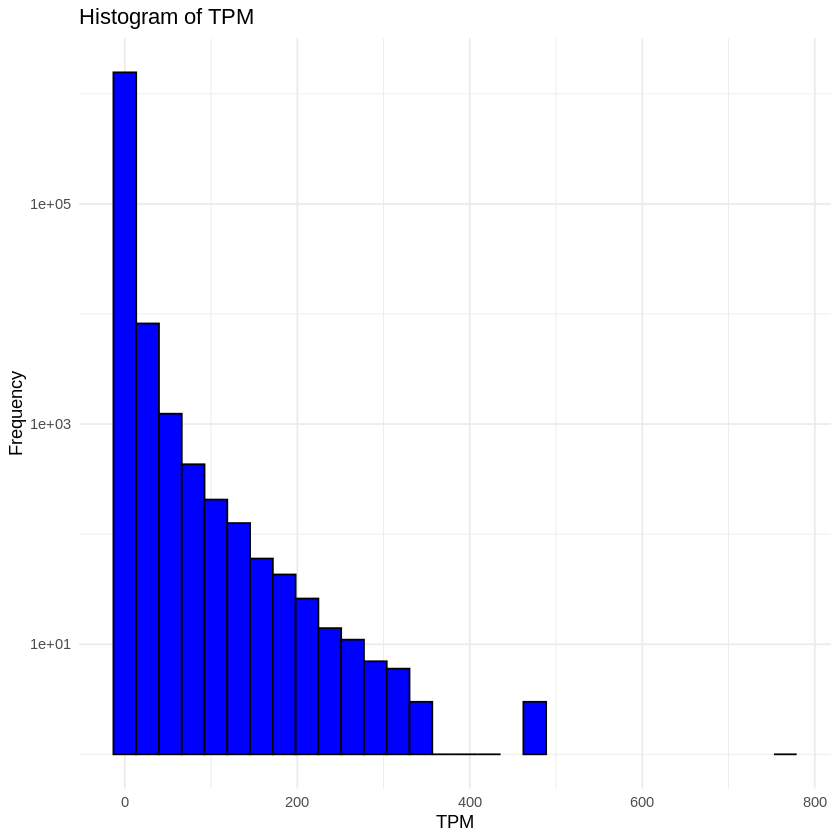

In [4]:
data <- read.csv("/homes/tlin/test/visualise/quant.sf", sep = "\t", header = TRUE)

 ggplot(data, aes(x = TPM)) +
  geom_histogram(fill = "blue", color = "black") +
  theme_minimal() +
  scale_y_log10() +
  labs(title = "Histogram of TPM",
       x = "TPM",
       y = "Frequency")



`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 17 rows containing missing values (`geom_bar()`).”


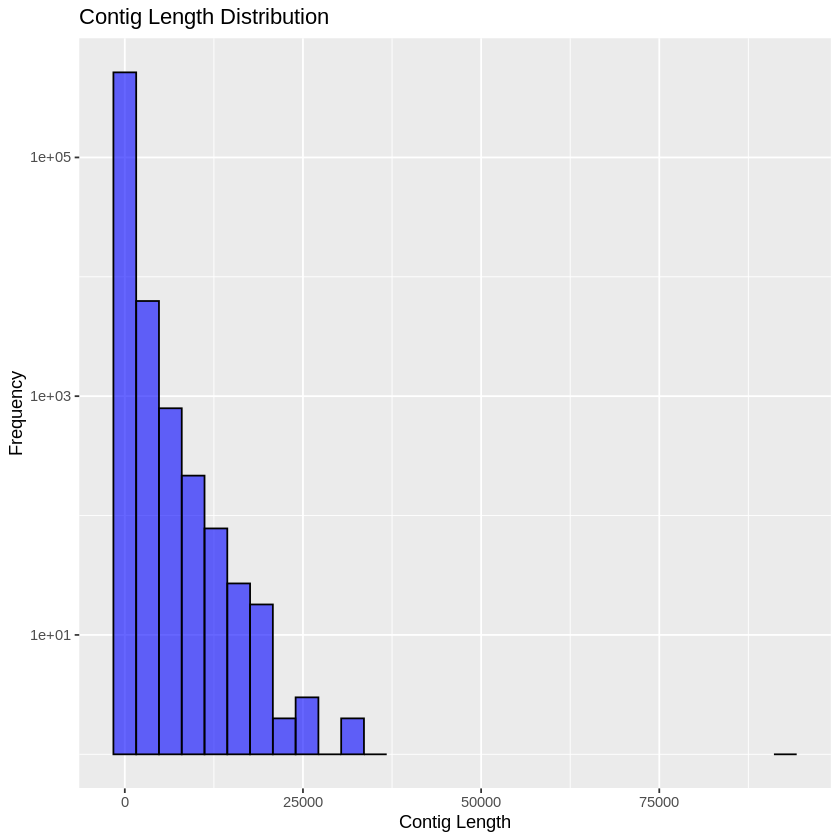

In [5]:


fasta <- readDNAStringSet("/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/Mikrobiom_Test_04_S3/transabyss_contigs.fa")
contig_lengths <- width(fasta)

ggplot() + geom_histogram(aes(x=contig_lengths), fill="blue", color="black", alpha=0.6) +
    scale_y_log10() +
    xlab("Contig Length") + ylab("Frequency") + ggtitle("Contig Length Distribution")



Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 16 rows containing missing values (`geom_bar()`).”


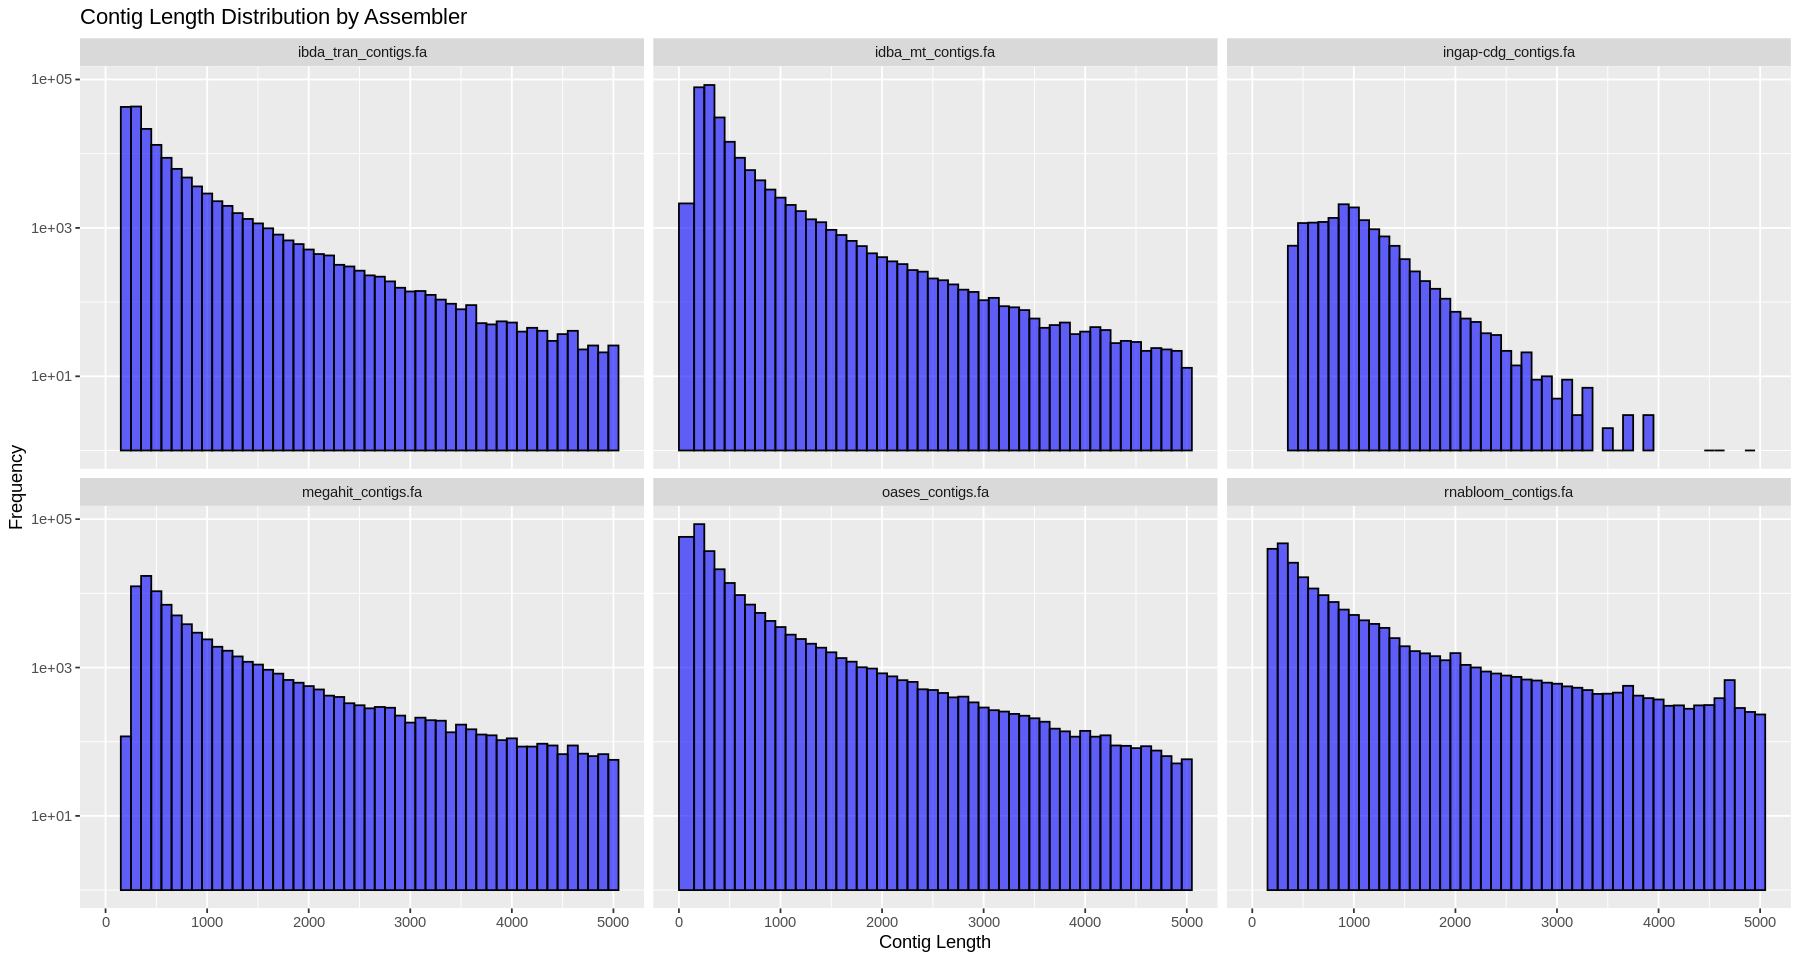

In [36]:
options(repr.plot.width=15, repr.plot.height=8)


# List of FASTA files
fasta_files <- c(
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/ibda_tran_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/idba_mt_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/ingap-cdg_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/megahit_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/oases_contigs.fa",
  "/homes/tlin/Projects/assembler_benchmark_pipeline/results/assembler/M_D_PF_013b_S11/rnabloom_contigs.fa"
)
# Function to read a FASTA file and return a data frame with contig lengths and file name
read_contig_lengths <- function(file_path) {
  fasta <- readDNAStringSet(file_path)
  contig_lengths <- width(fasta)
  data.frame(length = contig_lengths, file = basename(file_path))
}

breaks <- c(0, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250, 1350, 1450, 1550,
1650, 1750, 1850, 1950, 2050, 2150, 2250, 2350, 2450, 2550, 2650, 2750, 2850, 2950, 3050, 3150,
 3250, 3350, 3450, 3550, 3650, 3750, 3850, 3950, 4050, 4150, 4250, 4350, 4450, 4550, 4650, 4750, 4850, 4950, 5050)

breaks <- c(0, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250, 1350, 1450, 1550,
1650, 1750, 1850, 1950, 2050, 2150, 2250, 2350, 2450, 2550, 2650, 2750, 2850, 2950, 3050, 3150,
 3250, 3350, 3450, 3550, 3650, 3750, 3850, 3950, 4050, 4150, 4250, 4350, 4450, 4550, 4650, 4750, 4850, 4950, 5050)
#option 2
#breaks = c(0, 250, 500, 750, 1000, 1500, 2000, 5000, 6000, 10000)

# Read all files and combine into one data frame
all_lengths <- do.call(rbind, lapply(fasta_files, read_contig_lengths))

# Plot the histogram with facets
ggplot(all_lengths, aes(x = length)) +
    geom_histogram(fill = "blue", color = "black", alpha = 0.6, breaks = breaks) + # Adjust binwidth as needed
    scale_y_log10() +
    facet_wrap(~ file, scales = "fixed") +
    xlab("Contig Length") +
    ylab("Frequency") +
    ggtitle("Contig Length Distribution by Assembler") +
    theme(legend.position = "none")


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 116 rows containing missing values (`geom_bar()`).”


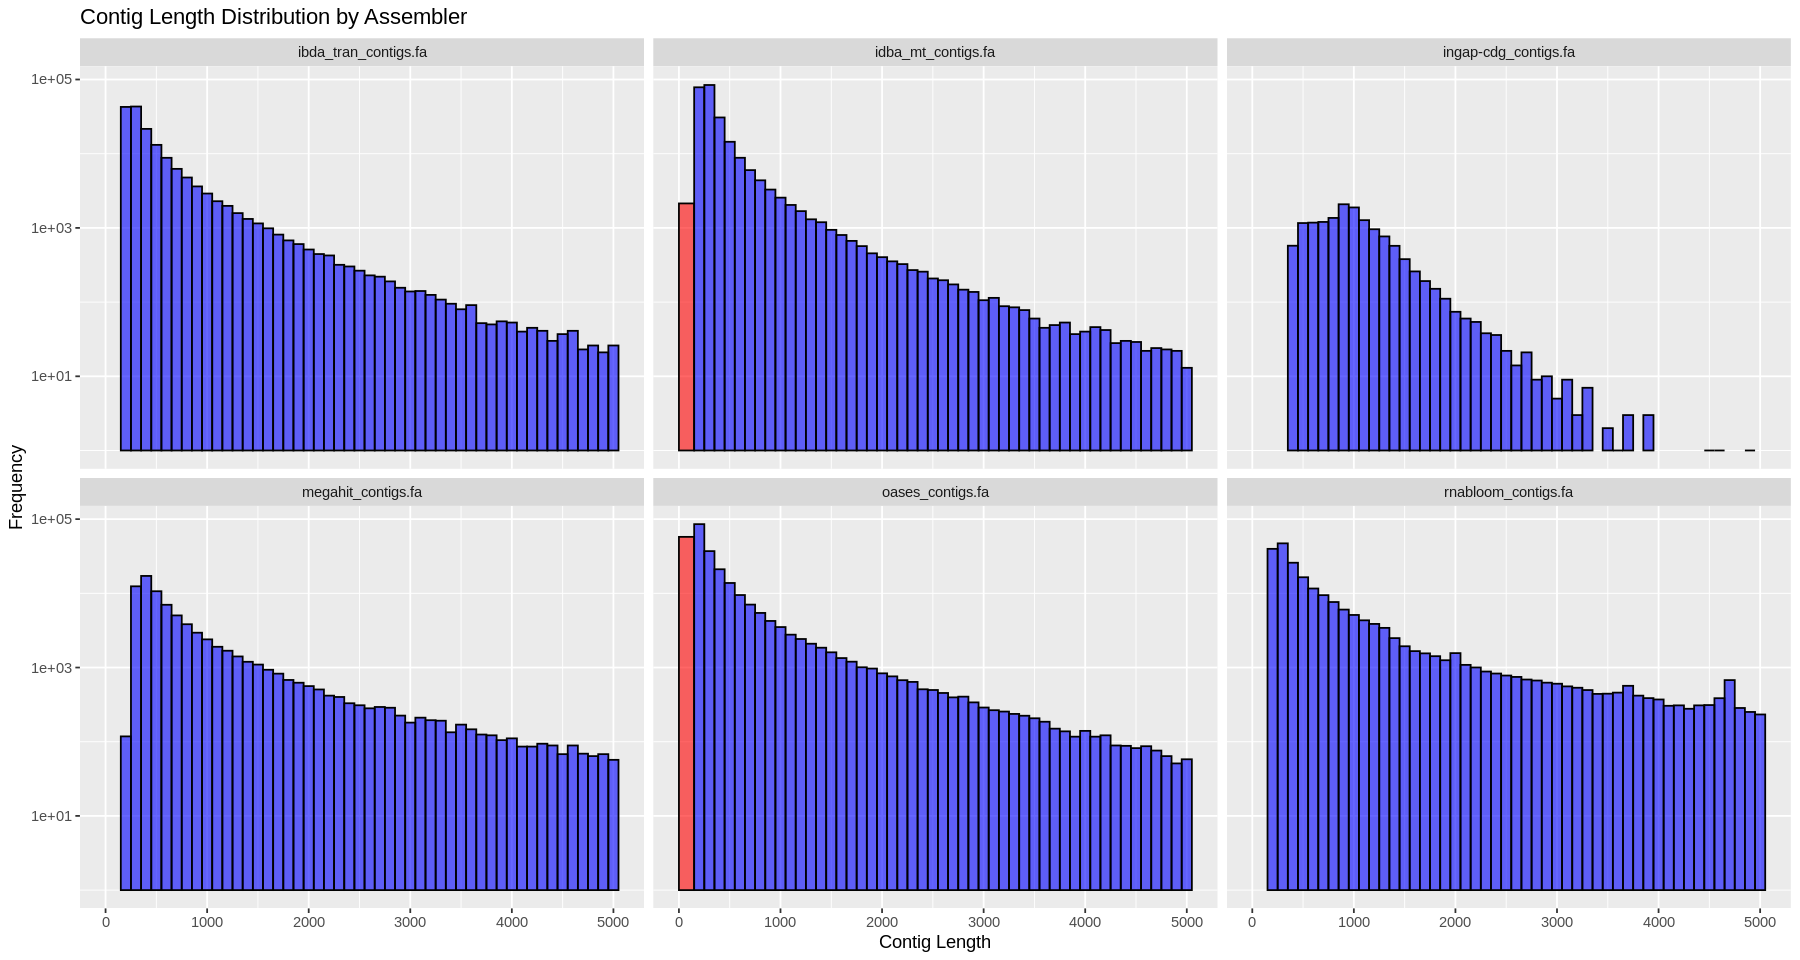

In [59]:
options(repr.plot.width=15, repr.plot.height=8)


library(Biostrings)
library(ggplot2)


breaks <- c(0, 150, 250, 350, 450, 550, 650, 750, 850, 950, 1050, 1150, 1250, 1350, 1450, 1550,
1650, 1750, 1850, 1950, 2050, 2150, 2250, 2350, 2450, 2550, 2650, 2750, 2850, 2950, 3050, 3150,
 3250, 3350, 3450, 3550, 3650, 3750, 3850, 3950, 4050, 4150, 4250, 4350, 4450, 4550, 4650, 4750, 4850, 4950, 5050)
# [Your existing code for reading FASTA files and defining breaks]

# Read all files and combine into one data frame
all_lengths <- do.call(rbind, lapply(fasta_files, read_contig_lengths))

# Add a new column to indicate if the length falls into the first bin
all_lengths$first_bin <- ifelse(all_lengths$length >= breaks[1] & all_lengths$length <= breaks[2], "First Bin", "Other Bins")

# Plot the histogram with facets
ggplot(all_lengths, aes(x = length, fill = first_bin, color=first_bin)) +
    geom_histogram(color = "black", alpha = 0.6, breaks = breaks) + 
    scale_fill_manual(values = c("First Bin" = "red", "Other Bins" = "blue")) +
    scale_y_log10() +
    facet_wrap(~ file, scales = "fixed") +
    xlab("Contig Length") +
    ylab("Frequency") +
    ggtitle("Contig Length Distribution by Assembler") +
    theme(legend.position = "none")


In [18]:
# Verify the first_bin column
table(all_lengths$first_bin)



 First Bin Other Bins 
     57381     934486 

In [44]:
unique(all_lengths[all_lengths$first_bin == "First Bin",]$file)

[1] "idba_mt_contigs.fa" "oases_contigs.fa"